## Tomato Leaf Disease Detection

Early detection of tomato leaf diseases is critical to increase agricultural productivity and reduce crop loss. In this study, a deep learning model was developed to detect tomato leaf diseases. The model aims to identify diseases on tomato leaves using image processing and machine learning techniques. In this process, the performance of the model was increased by using the transfer learning method VGG16.

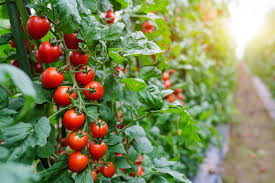

<a href='https://www.kaggle.com/datasets/kaustubhb999/tomatoleaf' target=_blank>You can find the data file here</a>

In [1]:
# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

## Import Libraries

In [3]:
import os
import cv2
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Input, Reshape, MaxPooling2D, Flatten, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from IPython.display import Image
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import save_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
import warnings
warnings.filterwarnings('ignore')

In [3]:
print(os.listdir('/kaggle/input/tomatoleaf/tomato/train/'))

['Tomato___Late_blight', 'Tomato___healthy', 'Tomato___Early_blight', 'Tomato___Septoria_leaf_spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Bacterial_spot', 'Tomato___Target_Spot', 'Tomato___Tomato_mosaic_virus', 'Tomato___Leaf_Mold', 'Tomato___Spider_mites Two-spotted_spider_mite']


In [4]:
labels=['Tomato___Late_blight', 'Tomato___healthy', 'Tomato___Early_blight', 'Tomato___Septoria_leaf_spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
        'Tomato___Bacterial_spot', 'Tomato___Target_Spot', 'Tomato___Tomato_mosaic_virus', 'Tomato___Leaf_Mold', 'Tomato___Spider_mites Two-spotted_spider_mite']

img_path='/kaggle/input/tomatoleaf/tomato/train/'

## Reading the pictures and labels

In [5]:
img_list=[]
label_list=[]
for label in labels:
    for img_file in os.listdir(img_path+label):
        img_list.append(img_path+label+'/'+img_file)
        label_list.append(label)

In [6]:
df=pd.DataFrame({'img':img_list,'label':label_list})

In [7]:
df.sample(5)

,img,label
6272,/kaggle/input/tomatoleaf/tomato/train/Tomato__...,Tomato___Target_Spot
7572,/kaggle/input/tomatoleaf/tomato/train/Tomato__...,Tomato___Tomato_mosaic_virus
6366,/kaggle/input/tomatoleaf/tomato/train/Tomato__...,Tomato___Target_Spot
4832,/kaggle/input/tomatoleaf/tomato/train/Tomato__...,Tomato___Tomato_Yellow_Leaf_Curl_Virus
9701,/kaggle/input/tomatoleaf/tomato/train/Tomato__...,Tomato___Spider_mites Two-spotted_spider_mite


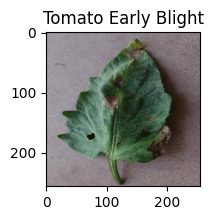

In [4]:
p='/kaggle/input/tomatoleaf/tomato/train/Tomato___Early_blight/0114f7b3-7f56-4bef-aa47-7a82da142d4b___RS_Erly.B 7437.JPG'
plt.figure(figsize=(2,2))
plt.imshow(plt.imread(p))
plt.title('Tomato Early Blight')
plt.show()

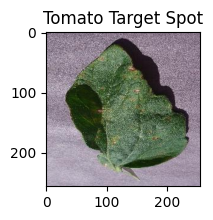

In [5]:
p='/kaggle/input/tomatoleaf/tomato/train/Tomato___Target_Spot/0044d10f-7062-4655-8abd-9fffc5b2f152___Com.G_TgS_FL 7908.JPG'
plt.figure(figsize=(2,2))
plt.imshow(plt.imread(p))
plt.title('Tomato Target Spot')
plt.show()

## Label Encoding

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['encoded_labels'] = le.fit_transform(df['label'])

In [9]:
df.sample(5)

,img,label,encoded_labels
4730,/kaggle/input/tomatoleaf/tomato/train/Tomato__...,Tomato___Tomato_Yellow_Leaf_Curl_Virus,7
2665,/kaggle/input/tomatoleaf/tomato/train/Tomato__...,Tomato___Early_blight,1
8846,/kaggle/input/tomatoleaf/tomato/train/Tomato__...,Tomato___Leaf_Mold,3
3419,/kaggle/input/tomatoleaf/tomato/train/Tomato__...,Tomato___Septoria_leaf_spot,4
2317,/kaggle/input/tomatoleaf/tomato/train/Tomato__...,Tomato___Early_blight,1


In [27]:
x=[]
for img in df['img']:
    img=cv2.imread(img)
    img=cv2.resize(img,(64,64))
    img=img/255.0
    x.append(img)

## Modelling

In [28]:
x=np.array(x)

In [29]:
y=df['encoded_labels']

In [30]:
print(len(x))
print(len(y))

10000
10000


In [31]:
print(len(labels))

10


In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [33]:
model=Sequential()
model.add(Input(shape=(64,64,3)))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128))
model.add(Dense(10,activation='softmax'))
early_stopping=EarlyStopping(monitor='val_accuracy', patience=10, verbose=1)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [34]:
history=model.fit(x_train,y_train,epochs=25,verbose=1,batch_size=36,validation_data=(x_test,y_test),callbacks=[early_stopping])

Epoch 1/25
223/223 ━━━━━━━━━━━━━━━━━━━━ 26s 109ms/step - accuracy: 0.3313 - loss: 2.0210 - val_accuracy: 0.6795 - val_loss: 0.9546
Epoch 2/25
223/223 ━━━━━━━━━━━━━━━━━━━━ 24s 106ms/step - accuracy: 0.7317 - loss: 0.8006 - val_accuracy: 0.7580 - val_loss: 0.7133
Epoch 3/25
223/223 ━━━━━━━━━━━━━━━━━━━━ 24s 107ms/step - accuracy: 0.8169 - loss: 0.5511 - val_accuracy: 0.7865 - val_loss: 0.6366
Epoch 4/25
223/223 ━━━━━━━━━━━━━━━━━━━━ 41s 106ms/step - accuracy: 0.8670 - loss: 0.3882 - val_accuracy: 0.8080 - val_loss: 0.5805
Epoch 5/25
223/223 ━━━━━━━━━━━━━━━━━━━━ 24s 108ms/step - accuracy: 0.8974 - loss: 0.3145 - val_accuracy: 0.8270 - val_loss: 0.5213
Epoch 6/25
223/223 ━━━━━━━━━━━━━━━━━━━━ 24s 107ms/step - accuracy: 0.9201 - loss: 0.2490 - val_accuracy: 0.8115 - val_loss: 0.6390
Epoch 7/25
223/223 ━━━━━━━━━━━━━━━━━━━━ 23s 104ms/step - accuracy: 0.9279 - loss: 0.2205 - val_accuracy: 0.8385 - val_loss: 0.5361
Epoch 8/25
223/223 ━━━━━━━━━━━━━━━━━━━━ 24s 108ms/step - accuracy: 0.9598 - loss: 0

In [35]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,879,328 (18.61 MB)

 Trainable params: 1,626,442 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,252,886 (12.41 MB)

In [36]:
loss,accuracy=model.evaluate(x_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.8527 - loss: 0.8242
Test Loss: 0.8657913208007812
Test Accuracy: 0.8535000085830688


In [37]:
pred=model.predict(x_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step


In [38]:
confusion_matrix(y_test,np.argmax(pred,axis=1))

array([[174,   3,   1,   0,   4,   0,   0,   3,   0,   1],
       [  7, 123,  25,  11,   5,   7,  11,   2,   1,   0],
       [  2,  20, 159,   8,  13,   1,   1,   1,   0,   3],
       [  0,   7,   3, 181,  15,   2,   1,   0,   1,   2],
       [  2,   3,   5,  15, 159,   1,   8,   0,   6,   2],
       [  0,   3,   1,   1,   1, 140,  23,   3,   3,   0],
       [  2,   3,   1,   0,   9,  10, 180,   1,   1,   4],
       [  7,   1,   0,   1,   0,   3,   2, 195,   0,   0],
       [  0,   0,   0,   3,   1,   0,   0,   0, 200,   0],
       [  0,   0,   0,   1,   1,   0,   4,   0,   0, 196]])

In [39]:
print(classification_report(y_test, np.argmax(pred,axis=1)))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       186
           1       0.75      0.64      0.69       192
           2       0.82      0.76      0.79       208
           3       0.82      0.85      0.84       212
           4       0.76      0.79      0.78       201
           5       0.85      0.80      0.83       175
           6       0.78      0.85      0.82       211
           7       0.95      0.93      0.94       209
           8       0.94      0.98      0.96       204
           9       0.94      0.97      0.96       202

    accuracy                           0.85      2000
   macro avg       0.85      0.85      0.85      2000
weighted avg       0.85      0.85      0.85      2000



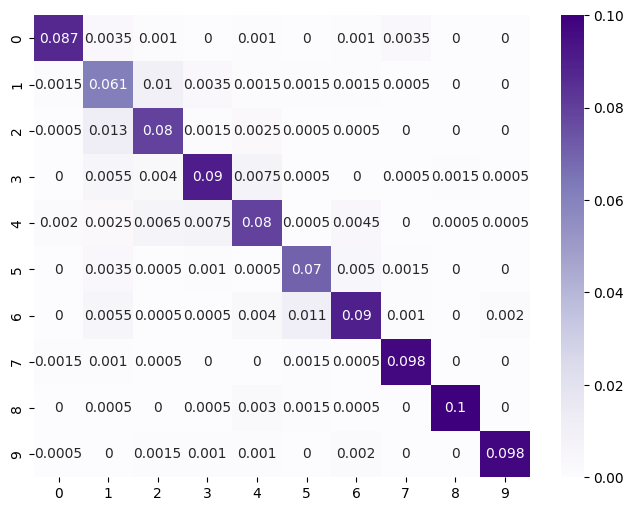

In [40]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(np.argmax(pred,axis=1), y_test)
normalized_cm=cm / cm.sum()
sns.heatmap(normalized_cm, annot=True, cmap='Purples',annot_kws={"size": 10});

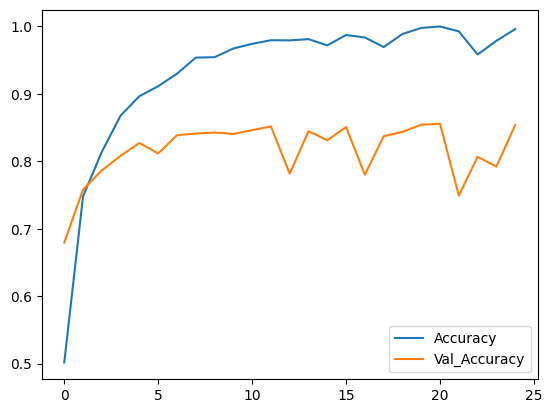

In [44]:
plt.plot(history.history['accuracy'],label='Accuracy')
plt.plot(history.history['val_accuracy'],label='Val_Accuracy')
plt.legend();

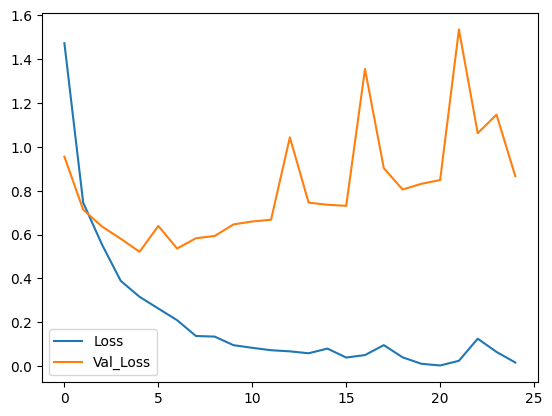

In [42]:
plt.plot(history.history['loss'],label='Loss')
plt.plot(history.history['val_loss'],label='Val_Loss')
plt.legend();

In [43]:
model.save('tomato.h5')

## Transfer Learning

In [47]:
data_dir='/kaggle/input/tomatoleaf/tomato/train'
test_dir='/kaggle/input/tomatoleaf/tomato/val'

img_width,img_height=64,64
train_datagen=ImageDataGenerator(rescale=1/255,validation_split=.20)
train_datagenerator=train_datagen.flow_from_directory(directory=data_dir,target_size=(img_width,img_height),class_mode='categorical', subset='training')

test_datagen=ImageDataGenerator(rescale=1/255)
test_datagenerator=train_datagen.flow_from_directory(directory=test_dir,target_size=(img_width,img_height),class_mode='categorical', subset='validation')

base_model=VGG16(weights='imagenet', input_shape=(img_width,img_height,3),include_top=False)

model=Sequential()

model.add(base_model)
for layer in base_model.layers:
    layer.trainable=False

model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dense(10,activation='softmax'))
early_stopping=EarlyStopping(monitor='val_accuracy', patience=10, verbose=1)
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

model.fit(train_datagenerator,epochs=25,validation_data=test_datagenerator,callbacks=[early_stopping])

Found 8000 images belonging to 10 classes.
Found 200 images belonging to 10 classes.
Epoch 1/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 192s 761ms/step - accuracy: 0.5343 - loss: 1.4123 - val_accuracy: 0.7500 - val_loss: 0.7492
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 192s 766ms/step - accuracy: 0.7681 - loss: 0.6613 - val_accuracy: 0.7700 - val_loss: 0.7518
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 191s 762ms/step - accuracy: 0.8199 - loss: 0.5154 - val_accuracy: 0.7650 - val_loss: 0.7160
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 191s 762ms/step - accuracy: 0.8512 - loss: 0.4153 - val_accuracy: 0.7900 - val_loss: 0.7133
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 202s 761ms/step - accuracy: 0.8751 - loss: 0.3695 - val_accuracy: 0.7700 - val_loss: 0.7003
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 203s 764ms/step - accuracy: 0.8907 - loss: 0.3160 - val_accuracy: 0.8000 - val_loss: 0.6077
Epoch 7/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 191s 764ms/step - accuracy: 0.9108 - loss: 0.2517 - val_accuracy: 0.8050 - val_loss

In [48]:
test_loss, test_acc=model.evaluate(test_datagenerator, verbose=2)
print('Test Accuracy:', test_acc)
print('Test Loss:', test_loss)

7/7 - 5s - 669ms/step - accuracy: 0.8050 - loss: 0.7752
Test Accuracy: 0.8050000071525574
Test Loss: 0.7751915454864502


In [49]:
model.save('tomato_tl.h5')

## Predictions

In [50]:
img=image.load_img('/kaggle/input/tomatoleaf/tomato/val/Tomato___Leaf_Mold/0adab1d4-5696-4cd8-8453-3931b70e856d___Crnl_L.Mold 8689.JPG', target_size=(224,224))
img=image.img_to_array(img)
img=np.expand_dims(img, axis=0)

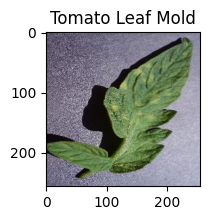

In [6]:
p='/kaggle/input/tomatoleaf/tomato/val/Tomato___Leaf_Mold/0adab1d4-5696-4cd8-8453-3931b70e856d___Crnl_L.Mold 8689.JPG'
plt.figure(figsize=(2,2))
plt.imshow(plt.imread(p))
plt.title('Tomato Leaf Mold')
plt.show()

In [52]:
model=VGG16(weights='imagenet')

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step


In [53]:
pred=model.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step


In [54]:
decode_predictions(pred, top=1)

35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


[[('n07714571', 'head_cabbage', 0.5250856)]]

## Summary

Images of tomato leaves and their labels were uploaded. The structure of the dataset was made suitable for training the model. The distribution of images and labels was visualized. This step was important to understand the class imbalance in the dataset. Categorical labels were converted to numerical values. This process is necessary for the model to understand the labels better. The dimensions of the images were determined, ensuring that all images were the same size. In addition, the images were normalized; this is important for speeding up the training process of the model and increasing its success. Features (x) and target variable (y) were defined. At this stage, the data were prepared for training the model. The selected model (e.g. Convolutional Neural Network) was trained on the data. The model optimized the parameters to classify the images. Various metrics were used to evaluate the performance of the model.
Confusion Matrix: Used to visualize the prediction performance of the model.
Classification Report: Metrics such as accuracy, recall and F1 score were calculated.
Visualization was made with graphics to better understand the training process and model performance.
Using VGG16 with Transfer Learning: The VGG16 model was used with the transfer learning method. This model was loaded with pre-trained weights and retrained to efficiently classify tomato leaves.
Testing with Decode Prediction:
During the testing of the model, the decode_prediction function was used to make the predictions understandable. This made it easier to see which classes the model predicted.

This study covers the application of deep learning techniques to detect diseases of tomato leaves. The analyzes and model evaluations provide important information for early detection of diseases in the agricultural sector. The transfer learning method provides a more effective solution in real-world applications by increasing the performance of the model. Such systems can help farmers and agricultural experts to quickly identify diseases and take the necessary precautions.